# Table of Contents

<br>

**Part 1: Data cleaning**
- [Loading training data](#Loading-training-data)
- [Exploration](#Exploration)
- [Training images](#Getting-training-data-(images))
- [Loading testing data](#Loading-testing-data)

***

**Part 2: Model Training**
- [Model Training Functions](#Functions-for-Model-Training)



# Loading training data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('shopee-product-detection-student/train.csv')
data

,filename,category
0,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,3
1,f74d1a5fc2498bbbfa045c74e3cc333e.jpg,3
2,f6c172096818c5fab10ecae722840798.jpg,3
3,251ffd610399ac00fea7709c642676ee.jpg,3
4,73c7328b8eda399199fdedec6e4badaf.jpg,3
...,...,...
105385,047a60001de0331608ba64092cc7ae2b.jpg,25
105386,ea39ac66ccdc4b4d4c6443f6c54d8ae3.jpg,25
105387,6215f8c52c5bbcfe3e63e0f3ac6265f8.jpg,25
105388,1733d8286f6658149c7b7cdeb40d6461.jpg,25


In [4]:
# padding labels
data['category'] = data['category'].apply(lambda x: "{:02}".format(x))
data

,filename,category
0,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,03
1,f74d1a5fc2498bbbfa045c74e3cc333e.jpg,03
2,f6c172096818c5fab10ecae722840798.jpg,03
3,251ffd610399ac00fea7709c642676ee.jpg,03
4,73c7328b8eda399199fdedec6e4badaf.jpg,03
...,...,...
105385,047a60001de0331608ba64092cc7ae2b.jpg,25
105386,ea39ac66ccdc4b4d4c6443f6c54d8ae3.jpg,25
105387,6215f8c52c5bbcfe3e63e0f3ac6265f8.jpg,25
105388,1733d8286f6658149c7b7cdeb40d6461.jpg,25


In [5]:
data['category'].unique()

array(['03', '04', '32', '35', '34', '33', '05', '02', '20', '18', '27',
       '11', '29', '16', '28', '17', '10', '19', '26', '21', '07', '38',
       '00', '36', '09', '31', '30', '37', '08', '01', '06', '39', '41',
       '24', '23', '15', '12', '40', '13', '14', '22', '25'], dtype=object)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105390 entries, 0 to 105389
Data columns (total 2 columns):
filename    105390 non-null object
category    105390 non-null object
dtypes: object(2)
memory usage: 1.6+ MB


In [7]:
data['category'].value_counts()

30    2705
24    2705
03    2703
04    2703
01    2702
27    2702
08    2700
09    2698
25    2692
12    2691
02    2687
36    2686
26    2684
14    2684
00    2683
13    2682
40    2681
19    2679
39    2678
31    2677
38    2673
10    2672
16    2665
07    2660
41    2660
35    2658
20    2653
06    2641
05    2641
15    2632
22    2623
34    2599
21    2598
28    2561
23    2540
32    2157
29    2138
18    2103
11    1843
37    1725
17    1553
33     573
Name: category, dtype: int64

In [8]:
dict_values = dict(data['category'].value_counts())
print(dict_values)

{'30': 2705, '24': 2705, '03': 2703, '04': 2703, '01': 2702, '27': 2702, '08': 2700, '09': 2698, '25': 2692, '12': 2691, '02': 2687, '36': 2686, '26': 2684, '14': 2684, '00': 2683, '13': 2682, '40': 2681, '19': 2679, '39': 2678, '31': 2677, '38': 2673, '10': 2672, '16': 2665, '07': 2660, '41': 2660, '35': 2658, '20': 2653, '06': 2641, '05': 2641, '15': 2632, '22': 2623, '34': 2599, '21': 2598, '28': 2561, '23': 2540, '32': 2157, '29': 2138, '18': 2103, '11': 1843, '37': 1725, '17': 1553, '33': 573}


In [9]:
beware = sorted([(i, value) for i,value in dict_values.items() if value <= 2500])
print(beware)

[('11', 1843), ('17', 1553), ('18', 2103), ('29', 2138), ('32', 2157), ('33', 573), ('37', 1725)]


In [10]:
print(f'Categories to be aware of that have significantly less images (<= 2500): {beware}')

Categories to be aware of that have significantly less images (<= 2500): [('11', 1843), ('17', 1553), ('18', 2103), ('29', 2138), ('32', 2157), ('33', 573), ('37', 1725)]


[Back to top](#Table-of-Contents)

# Exploration

In [11]:
def count_labels(df):
    list_of_categories = list(sorted(df.unique()))
    data_count = []
    
    for i in list_of_categories:
        data_count.append(sum(df == i))
    
    return data_count

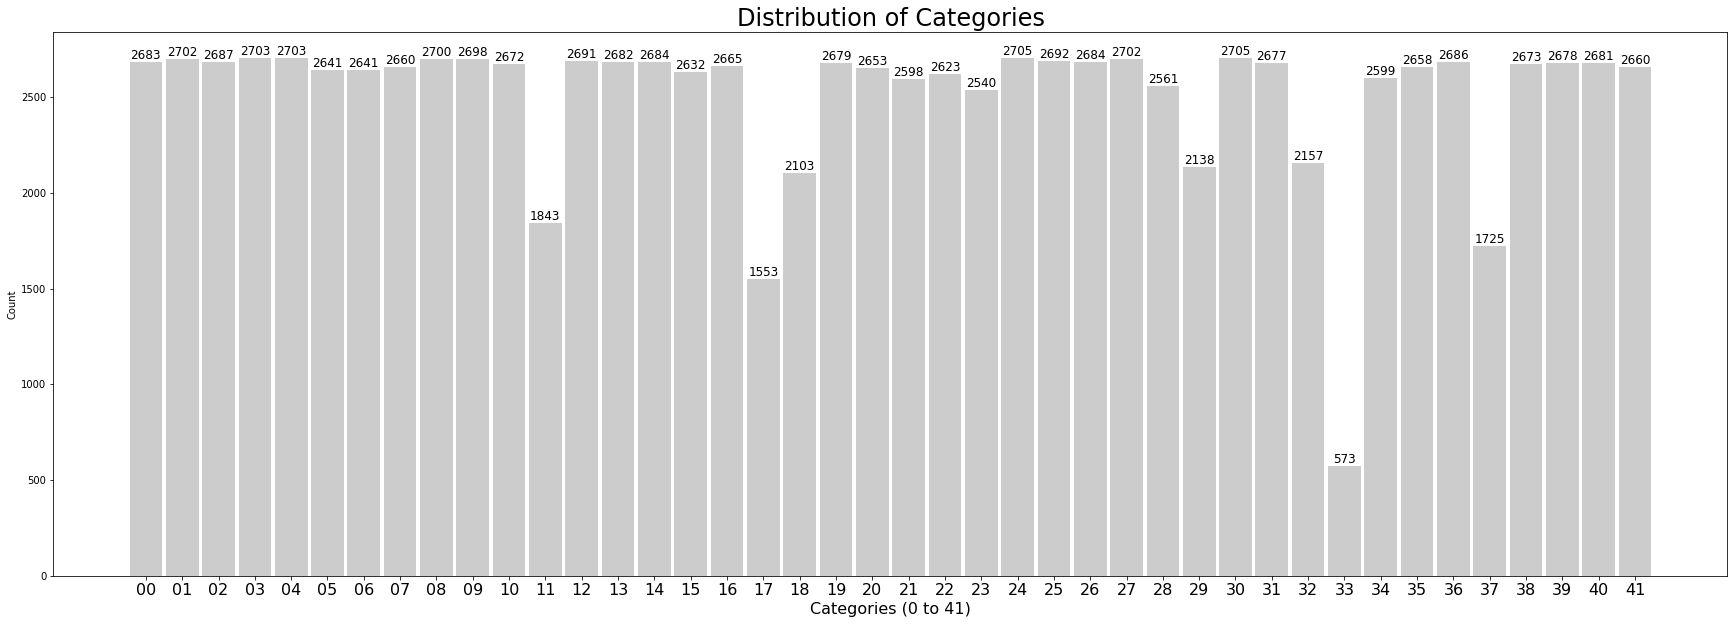

In [12]:
category_count = count_labels(data['category'])
labels = list(sorted(data['category'].unique()))

x = np.arange(len(labels))
width = 0.9

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
rects = ax.bar(x, category_count, width, label='count', align='center', color='0.8')
# ax.plot(x, category_count)

ax.set_ylabel('Count')
ax.set_xlabel('Categories (0 to 41)', fontsize='16')
ax.set_title('Distribution of Categories', fontsize = '24')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize='16')
ax.autoscale()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0,3),
                   textcoords='offset points',
                   ha='center',
                   fontsize='12')
        
autolabel(rects)

plt.savefig('category_distribution.png')
plt.show()

[Back to top](#Table-of-Contents)

# Getting training data (images)

In [13]:
import os

images_path = 'shopee-product-detection-student/train/train/train/'
print(os.listdir(images_path))

['03', '04', '32', '35', '34', '33', '05', '02', '20', '18', '27', '11', '29', '16', '28', '17', '10', '19', '26', '21', '07', '38', '00', '36', '09', '31', '30', '37', '08', '01', '06', '39', '41', '24', '23', '15', '12', '40', '13', '14', '22', '25']


In [14]:
from keras_preprocessing.image import ImageDataGenerator

image_size = (224, 224)
batch_size = 128
# seed = 0

image_generator = ImageDataGenerator(rescale=1.0/255.0,
                                     validation_split=0.2)

images_path = 'shopee-product-detection-student/train/train/train/'
test_path = 'shopee-product-detection-student/test/test/test/'

training_generator = image_generator.flow_from_directory(directory=images_path,
                                                         target_size=image_size,
                                                       class_mode='categorical',
                                                       batch_size=batch_size,
                                                        subset='training',
                                                         shuffle=True,
                                                        seed=42)

valid_generator = image_generator.flow_from_directory(directory=images_path,
                                                      target_size=image_size,
                                                     class_mode='categorical',
                                                     batch_size=batch_size,
                                                     subset='validation',
                                                     shuffle=True,
                                                     seed=42)

classes = len(training_generator.class_indices)
# print(classes)

Found 84329 images belonging to 42 classes.
Found 21061 images belonging to 42 classes.


[Back to top](#Table-of-Contents)

# Loading testing data

In [15]:
test_data = pd.read_csv('shopee-product-detection-student/test.csv')
test_data

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,43
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,43
2,127f3e6d6e3491b2459812353f33a913.jpg,43
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,43
4,46d681a542f2c71be017eef6aae23313.jpg,43
...,...,...
12181,5ba958eacb23cd7d1673bad4dae55784.jpg,43
12182,efbe41a1c2b666b70e337e438559808b.jpg,43
12183,79fdaa5ac5ba10dbe8004cabd8c35eb3.jpg,43
12184,ac3d136124617637a05ba66694e381ef.jpg,43


In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12186 entries, 0 to 12185
Data columns (total 2 columns):
filename    12186 non-null object
category    12186 non-null int64
dtypes: int64(1), object(1)
memory usage: 190.5+ KB


In [17]:
test_image_generator = ImageDataGenerator(rescale=1.0/255.0)

In [19]:
test_generator = image_generator.flow_from_dataframe(dataframe=test_data,
                                                     directory=test_path,
                                                     x_col='filename',
                                                     target_size=image_size,
                                                     batch_size=batch_size,
                                                    class_mode=None,
                                                    shuffle=False,
                                                    seed=42)

Found 12186 validated image filenames.


[Back to top](#Table-of-Contents)

# Functions for Model Training

In [20]:
def model_predict(modelname, model, epoch_number=10):
    '''
    Training model using fit. (For tf < 2.2, use fit_generator)
    
    Training data: training_generator
    
    Arguments:
    - modelname: a string, name of model
    - epoch_number: number of epochs to run
    
    Returns:
    - history
    - checkpointfilepath
    '''
    
    checkpointfilepath = modelname + '_' + str(epoch_number) + '_' + 'model.h5'
    
    checkpoint = ModelCheckpoint(checkpointfilepath, 
                                 monitor='val_loss', 
                                 mode='min', 
                                 save_best_only=True,
                                 verbose=1)

    history = model.fit(training_generator,
                        steps_per_epoch=training_generator.n/training_generator.batch_size,
                        validation_data=valid_generator,
                        validation_steps=valid_generator.n/valid_generator.batch_size,
                        epochs=epoch_number,
                        verbose=1,
                        callbacks=[checkpoint])
    
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend()
    plt.show()

    t_end = time()
    print()
    print(f'Training the model took {(t_end - t_start) / 60:.2f} minutes.')
    
    return history, checkpointfilepath

In [21]:
def load_predictions(checkpointfilepath, modelname):
    '''
    Using the trained model to predict the test data and exports the csv file.
    
    Arguments:
    - checkpointfilepath: a string, '.5' filepath, get from model_predict() output
    - modelname
    
    Returns:
    - test data dataframe
    '''
    
    model = load_model(checkpointfilepath)
    
    test_generator.reset()
    pred = model.predict(test_generator,
                         steps=test_generator.n/test_generator.batch_size,
                         verbose=1)
    
    pred_class_indices = np.argmax(pred, axis=1)
    
    test_data['category'] = pred_class_indices
    test_data['category'] = test_data['category'].apply(lambda x: "{:02}".format(x))
    
    outfilename = 'test_data_' + modelname + '.csv'
    test_data.to_csv(outfilename, index=False)
    
    return test_data

[Back to top](#Table-of-Contents)

# Model Training -- MobileNetV2

In [40]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.applications.mobilenet_v2 import MobileNetV2

# base pre-trained model
base_model = MobileNetV2(input_shape=(100,100,3), include_top=False, weights='imagenet')

# global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(classes, activation='softmax')(x)

# model to use
model = Model(inputs=base_model.input, outputs=predictions)

# freeze all convolutional InceptionV3 layers
# train only the randomly initialized layers at the top
for layer in base_model.layers:
    layer.trainable = False
    
model.compile(optimizer='adam', loss='categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 101, 101, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 50, 50, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 50, 50, 32)   128         Conv1[0][0]                      
____________________________________________________________________________________________

### 10 epochs

In [43]:
from keras.callbacks import ModelCheckpoint
from time import time

t_start = time()

checkpoint = ModelCheckpoint('first_try_best_model.h5', 
                             monitor='val_loss', 
                             mode='min', 
                             save_best_only=True,
                            verbose=1)

history = model.fit_generator(generator=training_generator,
                              steps_per_epoch=training_generator.n/training_generator.batch_size,
                             validation_data=valid_generator,
                              validation_steps=valid_generator.n/valid_generator.batch_size,
                             epochs=10,
                             verbose=1,
                             callbacks=[checkpoint])

t_end = time()
print(f'Training the model took {(t_end - t_start) / 60:.2f} minutes.')

Epoch 1/10
1318/1317 [==============================] - 1264s 959ms/step - loss: 2.3416 - accuracy: 0.3800 - val_loss: 3.4844 - val_accuracy: 0.3201

Epoch 00001: val_loss improved from inf to 3.48437, saving model to first_try_best_model.h5
Epoch 2/10
1318/1317 [==============================] - 1288s 977ms/step - loss: 1.9893 - accuracy: 0.4629 - val_loss: 3.0617 - val_accuracy: 0.3521

Epoch 00002: val_loss improved from 3.48437 to 3.06169, saving model to first_try_best_model.h5
Epoch 3/10
1318/1317 [==============================] - 1271s 964ms/step - loss: 1.7935 - accuracy: 0.5093 - val_loss: 3.0956 - val_accuracy: 0.3248

Epoch 00003: val_loss did not improve from 3.06169
Epoch 4/10
1318/1317 [==============================] - 1272s 965ms/step - loss: 1.6203 - accuracy: 0.5492 - val_loss: 2.5637 - val_accuracy: 0.3277

Epoch 00004: val_loss improved from 3.06169 to 2.56373, saving model to first_try_best_model.h5
Epoch 5/10
1318/1317 [==============================] - 1286s 975

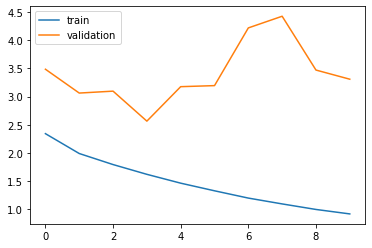

In [46]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [67]:
from keras.models import load_model

# load model
model = load_model('first_try_best_model.h5')

test_generator.reset()
pred = model.predict_generator(test_generator, steps=test_generator.n/test_generator.batch_size, verbose=1)

191/190 [==============================] - 152s 795ms/step


In [82]:
predicted_class_indices = np.argmax(pred,axis=1)
predicted_class_indices

array([37, 25, 14, ..., 15, 15, 23])

In [83]:
len(predicted_class_indices)

12186

In [91]:
test_data['category'] = predicted_class_indices
test_data['category'] = test_data['category'].apply(lambda x: "{:02}".format(x))
test_data

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,37
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,25
2,127f3e6d6e3491b2459812353f33a913.jpg,14
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,14
4,46d681a542f2c71be017eef6aae23313.jpg,08
...,...,...
12181,5ba958eacb23cd7d1673bad4dae55784.jpg,16
12182,efbe41a1c2b666b70e337e438559808b.jpg,19
12183,79fdaa5ac5ba10dbe8004cabd8c35eb3.jpg,15
12184,ac3d136124617637a05ba66694e381ef.jpg,15


In [90]:
# test_data.to_csv('submission.csv', index=False)

**Accuracy: 33.676%**

[Back to top](#Table-of-Contents)

### 50 epochs

In [115]:
history, checkpointfilepath = model_predict('MobileNetV2', epoch_number=75)

Epoch 1/75
1318/1317 [==============================] - 1281s 972ms/step - loss: 1.2072 - accuracy: 0.6518 - val_loss: 4.2258 - val_accuracy: 0.2962

Epoch 00001: val_loss improved from inf to 4.22584, saving model to MobileNetV2_75_model.h5
Epoch 2/75
1318/1317 [==============================] - 1235s 937ms/step - loss: 1.0992 - accuracy: 0.6780 - val_loss: 2.5857 - val_accuracy: 0.2971

Epoch 00002: val_loss improved from 4.22584 to 2.58571, saving model to MobileNetV2_75_model.h5
Epoch 3/75
1318/1317 [==============================] - 29391s 22s/step - loss: 1.0006 - accuracy: 0.7025 - val_loss: 4.5531 - val_accuracy: 0.2902

Epoch 00003: val_loss did not improve from 2.58571
Epoch 4/75
1318/1317 [==============================] - 3022s 2s/step - loss: 0.9200 - accuracy: 0.7247 - val_loss: 4.4545 - val_accuracy: 0.2867

Epoch 00004: val_loss did not improve from 2.58571
Epoch 5/75
1318/1317 [==============================] - 1269s 963ms/step - loss: 0.8564 - accuracy: 0.7422 - val_l

KeyboardInterrupt: 

In [ ]:
MobileNetV2_50_test = load_predictions(checkpointfilepath, 'MobileNetV2')

[Back to top](#Table-of-Contents)

# Model training -- MobileNetV2 (second try)

In [23]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D
from keras.applications.mobilenet_v2 import MobileNetV2

Using TensorFlow backend.


In [28]:
from keras.callbacks import ModelCheckpoint
from time import time
from keras.models import load_model

In [25]:
base_2 = MobileNetV2(input_shape=image_size+(3,), include_top=False, \
                    pooling = 'avg', weights='imagenet')
base_2.trainable = False
dense = Dense(42, activation='softmax', name='dense')(base_2.output)

model_v2 = Model(inputs=base_2.inputs, outputs=dense, name='mobilenetv2_2')
model_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [26]:
model_v2.summary()

Model: "mobilenetv2_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________

In [ ]:
hist, checkpointfilepath = model_predict('mobilenetv2_2', model_v2, epoch_number=3)

Epoch 1/3
  1/658 [..............................] - ETA: 14:40:29 - loss: 4.1941 - acc: 0.0078

# Model from scratch (v1)

In [136]:
# import tensorflow as tf
from keras import layers, Sequential
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.utils import layer_utils

In [142]:
model_v1 = Sequential()

model_v1.add(Conv2D(filters=64, 
                    kernel_size=2, 
                    padding='same', 
                    activation='relu', 
                    input_shape=((100,100,3))))
model_v1.add(MaxPooling2D(pool_size=2))
model_v1.add(Dropout(0.3))

model_v1.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model_v1.add(MaxPooling2D(pool_size=2))
model_v1.add(Dropout(0.3))

model_v1.add(Flatten())
model_v1.add(Dense(256, activation='relu'))
model_v1.add(Dropout(0.5))
model_v1.add(Dense(42, activation='softmax'))

In [144]:
model_v1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 64)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 32)        8224      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)            

In [145]:
model_v1.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

Epoch 1/10
1318/1317 [==============================] - 1217s 924ms/step - loss: 3.5867 - accuracy: 0.0651 - val_loss: 3.4073 - val_accuracy: 0.1376

Epoch 00001: val_loss improved from inf to 3.40725, saving model to model_v1_10_model.h5
Epoch 2/10
1318/1317 [==============================] - 1197s 908ms/step - loss: 3.3598 - accuracy: 0.1124 - val_loss: 2.6478 - val_accuracy: 0.1982

Epoch 00002: val_loss improved from 3.40725 to 2.64778, saving model to model_v1_10_model.h5
Epoch 3/10
1318/1317 [==============================] - 1189s 902ms/step - loss: 3.2463 - accuracy: 0.1347 - val_loss: 2.7015 - val_accuracy: 0.2091

Epoch 00003: val_loss did not improve from 2.64778
Epoch 4/10
1318/1317 [==============================] - 1190s 903ms/step - loss: 3.1571 - accuracy: 0.1534 - val_loss: 2.9537 - val_accuracy: 0.2344

Epoch 00004: val_loss did not improve from 2.64778
Epoch 5/10
1318/1317 [==============================] - 1192s 904ms/step - loss: 3.0905 - accuracy: 0.1684 - val_los

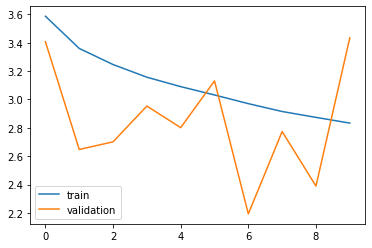


Training the model took 211.21 minutes.


In [146]:
history, checkpointfilepath = model_predict('model_v1', model_v1, epoch_number=10)

In [121]:
t_start = time()

checkpointer = ModelCheckpoint(filepath = 'model_v1_first.h5', verbose = 1, save_best_only = True)

history = model.fit_generator(generator=training_generator,
                              steps_per_epoch=training_generator.n/training_generator.batch_size,
                             validation_data=valid_generator,
                              validation_steps=valid_generator.n/valid_generator.batch_size,
                             epochs=10,
                             verbose=1,
                             callbacks=[checkpointer])

t_end = time()
print(f'Training the model took {(t_end - t_start) / 60:.2f} minutes.')

Epoch 1/10
 392/1317 [=======>......................] - ETA: 11:48 - loss: 0.4321 - accuracy: 0.8700

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [99]:
# load model
model_v1 = load_model('model_v1_first.h5')

test_generator.reset()
pred = model_v1.predict_generator(test_generator, steps=test_generator.n/test_generator.batch_size, verbose=1)

191/190 [==============================] - 153s 800ms/step


In [100]:
predicted_class_indices_model_v1 = np.argmax(pred,axis=1)
predicted_class_indices_model_v1

array([ 8, 17, 19, ..., 34, 15, 10])

In [101]:
test_data_model_v1 = pd.read_csv('shopee-product-detection-student/test.csv')
test_data_model_v1['category'] = predicted_class_indices_model_v1
test_data_model_v1['category'] = test_data_model_v1['category'].apply(lambda x: "{:02}".format(x))
test_data_model_v1

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,08
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,17
2,127f3e6d6e3491b2459812353f33a913.jpg,19
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,12
4,46d681a542f2c71be017eef6aae23313.jpg,10
...,...,...
12181,5ba958eacb23cd7d1673bad4dae55784.jpg,24
12182,efbe41a1c2b666b70e337e438559808b.jpg,19
12183,79fdaa5ac5ba10dbe8004cabd8c35eb3.jpg,34
12184,ac3d136124617637a05ba66694e381ef.jpg,15


In [102]:
test_data_model_v1.to_csv('submission_model_v1.csv', index=False)

[Back to top](#Table-of-Contents)